In [69]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [70]:
# conda install tensorflow

In [71]:
# conda install -c anaconda keras

In [72]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
# !pip install tensorflow==2.6.0


In [74]:

today = date.today()
yesterday = today - timedelta(days = 1)

In [75]:
import yfinance as yf
df = yf.download('AAPL',  start='2015-01-01', end=yesterday)
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565699,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210686,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000


In [76]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400


In [77]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03
mean,76.234145,77.113016,75.405446,76.298852,74.614716,1.290435e+08
std,50.492669,51.162163,49.869535,50.548567,51.074693,6.786470e+07
min,22.500000,22.917500,22.367500,22.584999,20.883028,3.519590e+07
25%,32.951875,33.233750,32.750001,33.015626,30.063910,8.361850e+07
50%,50.122499,50.701250,49.782499,50.278751,48.731251,1.097438e+08
75%,129.199997,130.924995,127.887501,129.717506,128.446350,1.535478e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,6.488252e+08


In [78]:
df.shape

(2100, 6)

In [79]:
df.isnull().values.any()

False

In [80]:
sum(df.duplicated())

0

In [81]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565699,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873646,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210686,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000


In [82]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


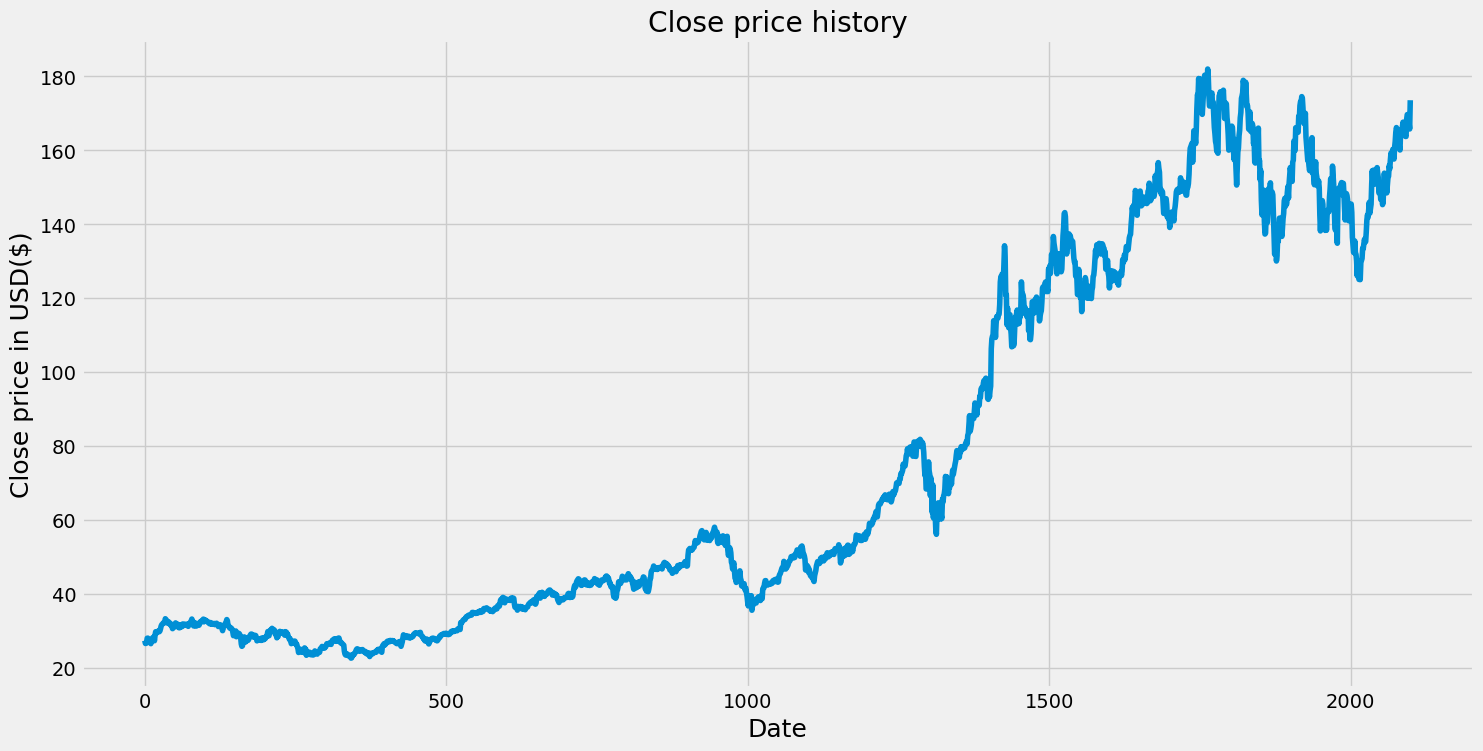

In [83]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD($)', fontsize=18)
plt.show()

In [84]:
data = df.filter(['Close'])

dataset = data.values # convert to numpy array

training_data_length = math.ceil(len(dataset) * 0.8)

In [85]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [86]:

# create training data set
train_data = scaled_data[:training_data_length, :]
x_train = [] #independent training variabls
y_train = [] #dependent training variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

#x_train contains 60 values which are used to train the 61th value
#   which is stored in y_train variable
     

In [87]:
#convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [88]:
#Reshape the data as LSTM expects input to be 3D but our current dataset is 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
     

In [89]:
# Now we will build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [90]:

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [91]:

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1620/1620 [==============================] - 19s 11ms/step - loss: 0.0010


In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


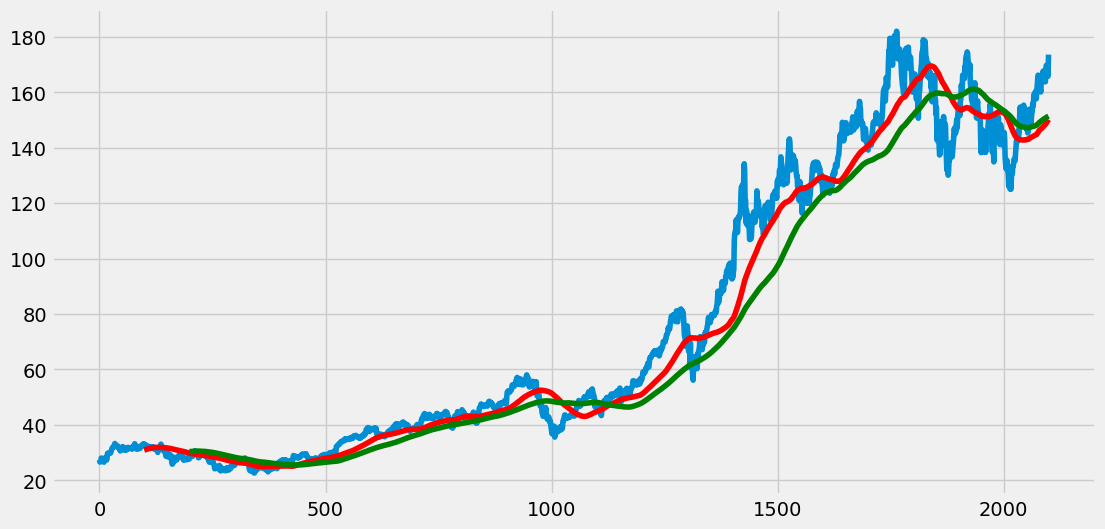

In [93]:
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [94]:
model.save('keras_model.h5')

In [95]:

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_length - 60:, :]

x_test = []
y_test = dataset[training_data_length: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])
     

In [96]:

#Convert the data to a numpy array
x_test = np.array(x_test)

In [97]:
# Reshape again to make it 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [98]:

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling values

14/14 [==============================] - 0s 8ms/step


In [99]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

2.955208024524507

/var/folders/9l/h11h1ss16c37g0cf8f8pt_zc0000gn/T/ipykernel_15636/3302113473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_val['Predictions'] = predictions


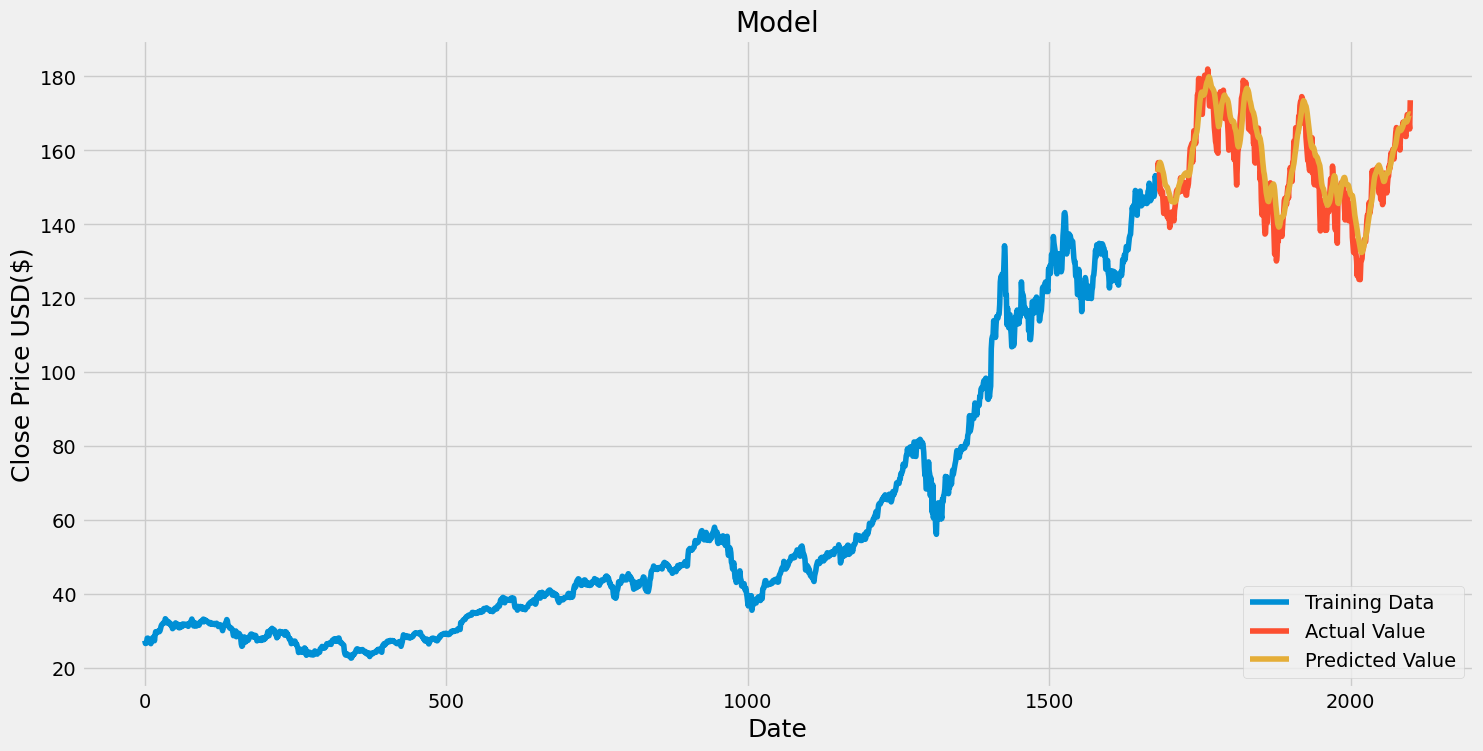

In [100]:

# Plot the data
train = data[:training_data_length]
actual_val = data[training_data_length:]
actual_val['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(actual_val[['Close', 'Predictions']])
plt.legend(['Training Data', 'Actual Value', 'Predicted Value'], loc = 'lower right')

In [101]:
# Show the valid and predicted prices
actual_val

,Close,Predictions
1680,154.300003,154.169022
1681,156.690002,154.831192
1682,155.110001,155.689285
1683,154.070007,156.358154
1684,148.970001,156.769318
...,...,...
2095,169.589996,168.519852
2096,168.539993,169.140610
2097,167.449997,169.615845
2098,165.789993,169.865021


In [102]:

# Get the quote
apple_quote = yf.download('AAPL',  start='2012-01-01', end=yesterday)
new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values #convert to np array
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_scale_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_scale_price)

print("the predicted price for AAPL",pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 15ms/step
the predicted price for AAPL [[170.46608]]
